In [1]:
# подключаем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 10)

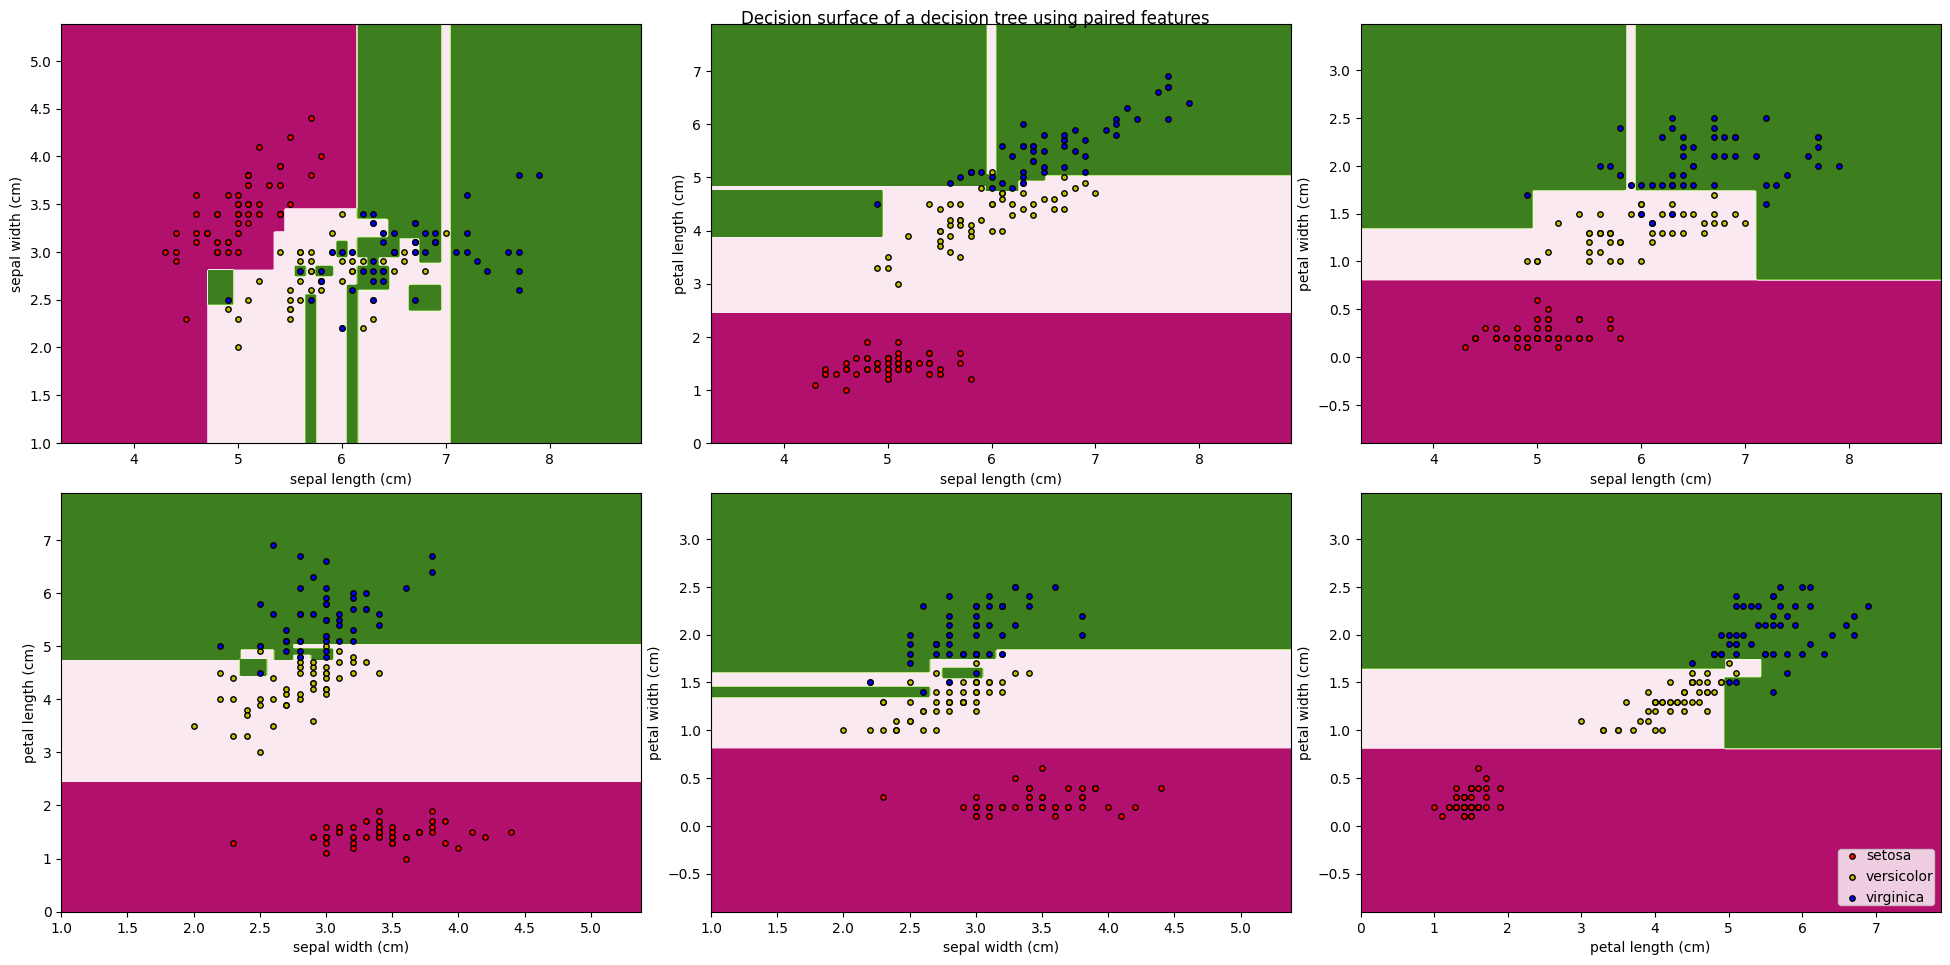

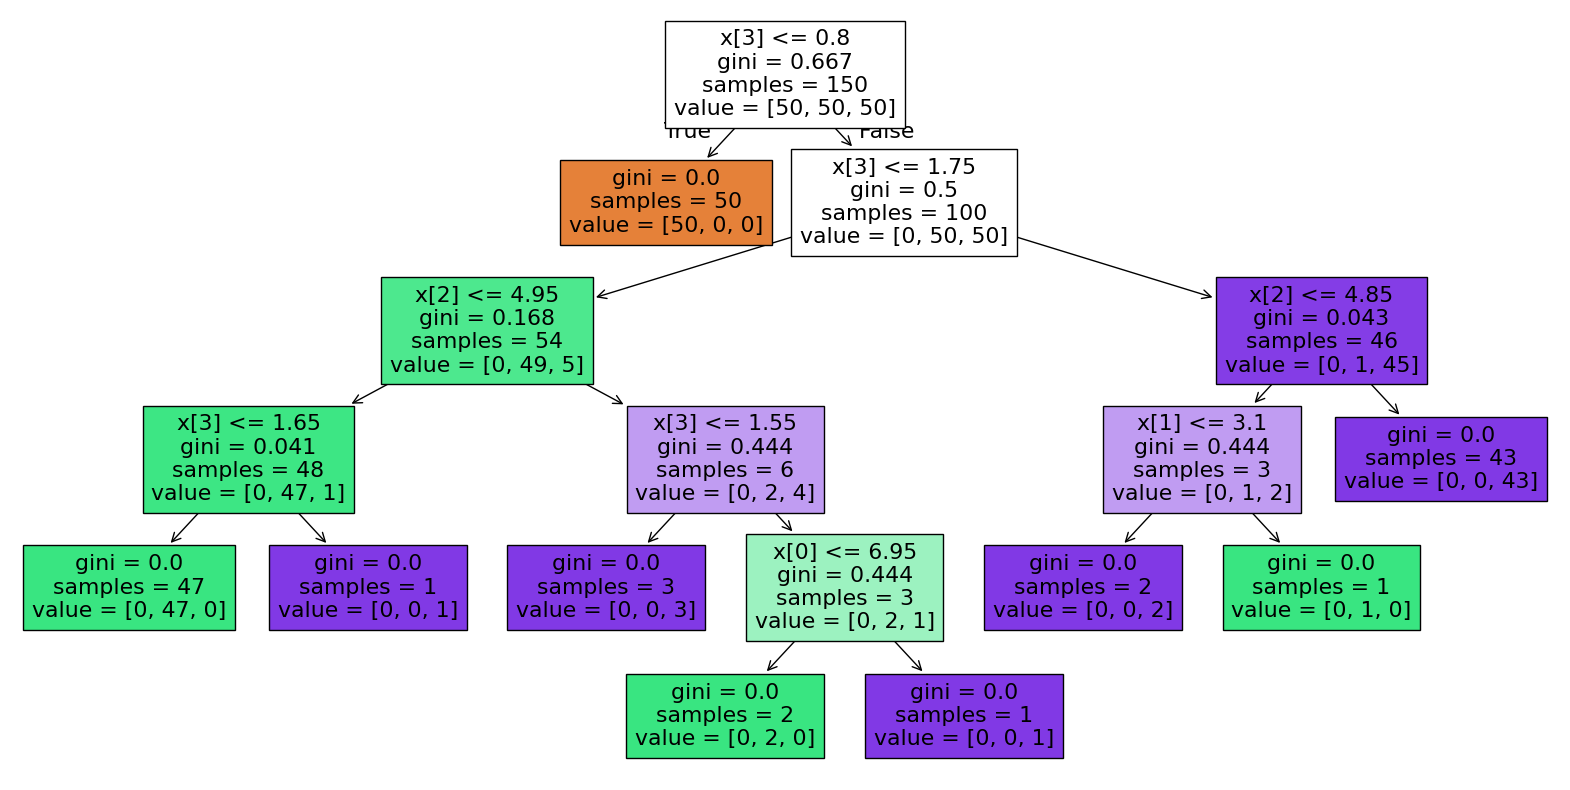

In [16]:
# Импорт необходимых библиотек
# Параметры для построения графиков
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Загружаем набор данных Iris
iris = load_iris()

# Пairs индексов признаков для построения графиков
pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

# Создаём подграфики для каждой пары признаков
for pairidx, pair in enumerate(pairs):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier(criterion='gini').fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Рисуем контурфилл с изменённым colormap
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.PiYG)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    edgecolor='black', s=15)

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()


Лучшие гиперпараметры: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


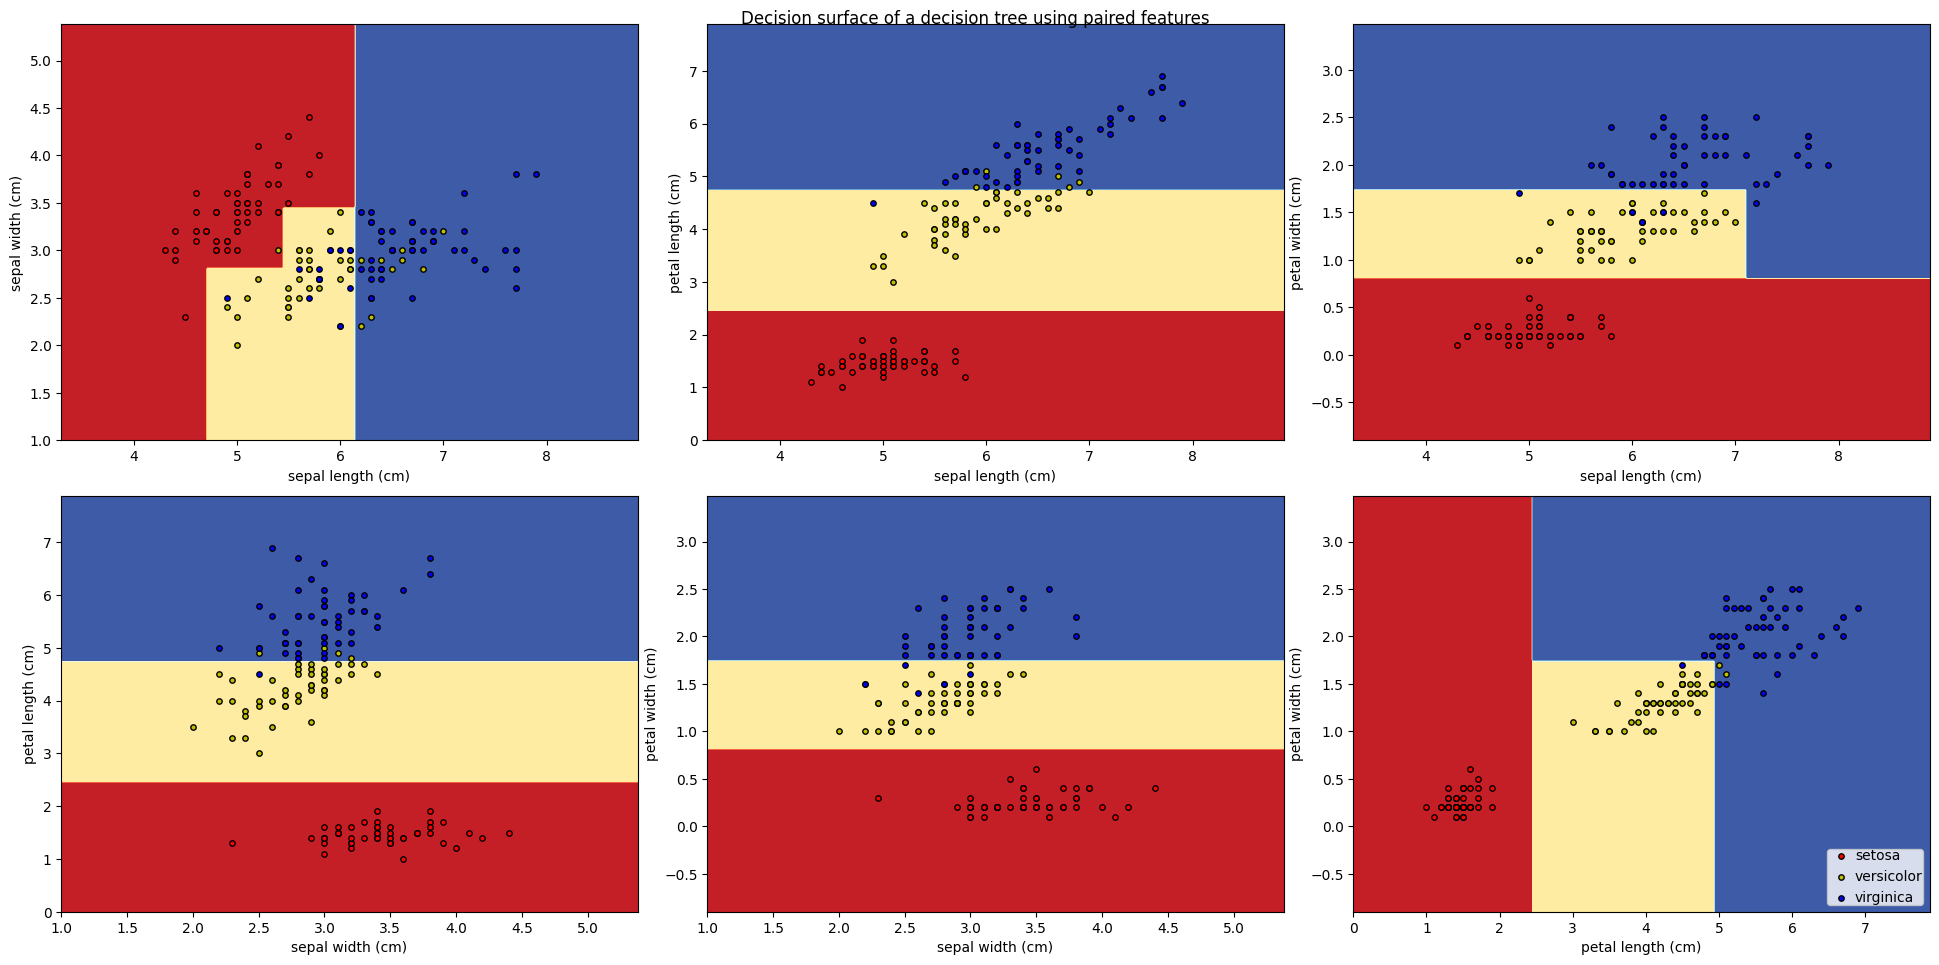

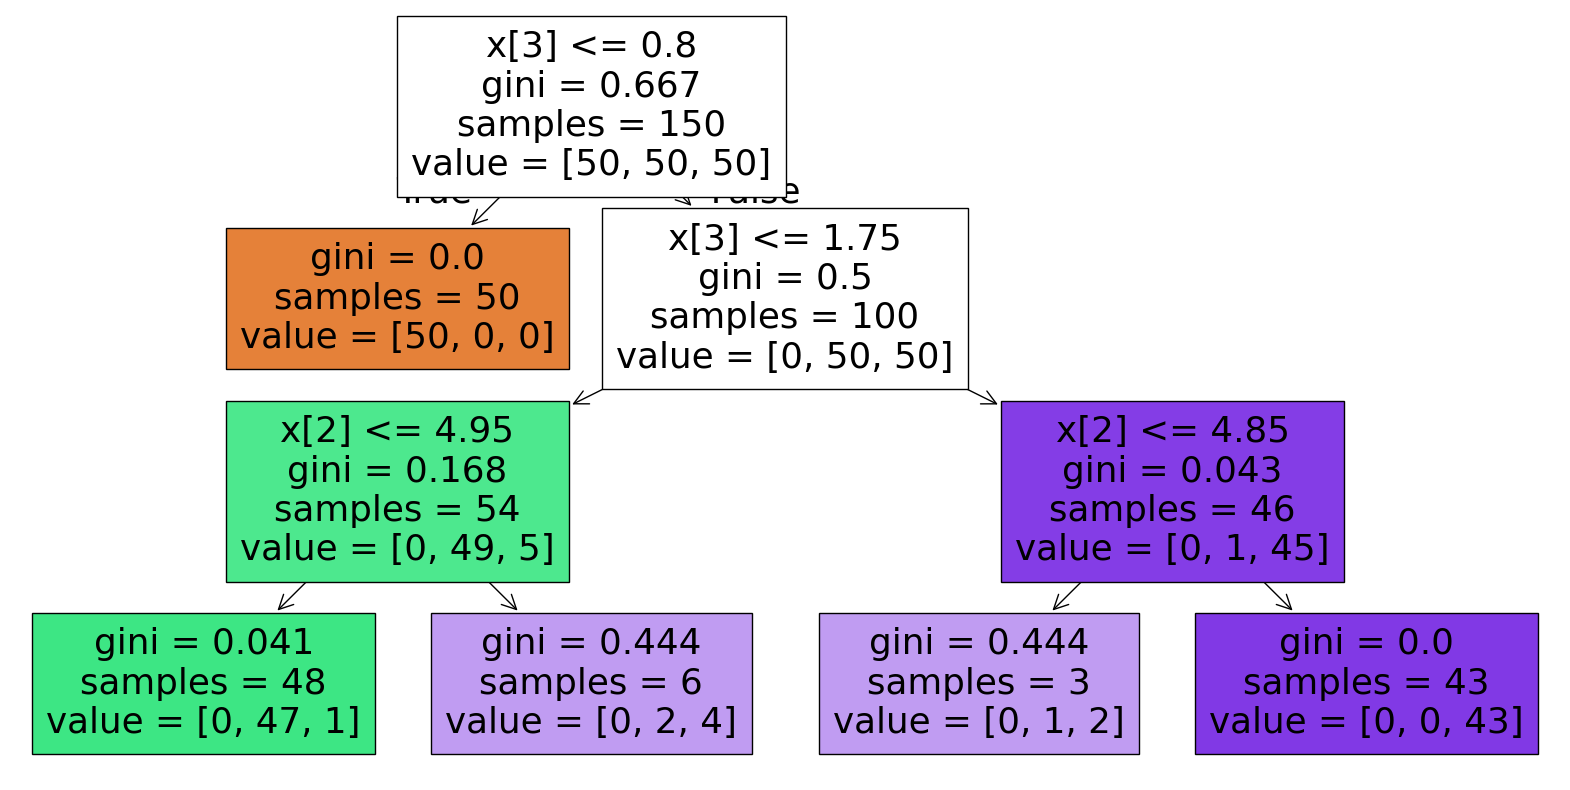

In [18]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

# Параметры для построения графиков
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Загружаем набор данных Iris
iris = load_iris()

# Пairs индексов признаков для построения графиков
pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

# Определение диапазона гиперпараметров для оптимизации
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Поиск лучших гиперпараметров
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(iris.data, iris.target)

# Лучшие гиперпараметры
best_params = grid_search.best_params_
print(f"Лучшие гиперпараметры: {best_params}")

# Создаём подграфики для каждой пары признаков с лучшими параметрами
for pairidx, pair in enumerate(pairs):
    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier(**best_params).fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier(**best_params).fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()
